In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("wifi_localization.txt" , sep = "\t" ,header=None)
df.columns = ["wifi1 " , "ifi2" , "wifi3" ,"wifi4 " , "wifi5" , "wifi6" , "wifi7 ", "Room" ]
df.head()

,wifi1,ifi2,wifi3,wifi4,wifi5,wifi6,wifi7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [16]:
df.tail()

,wifi1,ifi2,wifi3,wifi4,wifi5,wifi6,wifi7,Room
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4
1999,-59,-50,-45,-60,-45,-88,-87,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   wifi1   2000 non-null   int64
 1   ifi2    2000 non-null   int64
 2   wifi3   2000 non-null   int64
 3   wifi4   2000 non-null   int64
 4   wifi5   2000 non-null   int64
 5   wifi6   2000 non-null   int64
 6   wifi7   2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [19]:
df.Room.value_counts()  # Balance data (dengeli data)

1    500
2    500
3    500
4    500
Name: Room, dtype: int64

array([1, 2, 3, 4], dtype=int64)

In [22]:
df.describe()

,wifi1,ifi2,wifi3,wifi4,wifi5,wifi6,wifi7,Room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


## Veriyi Anlamak

<Axes: >

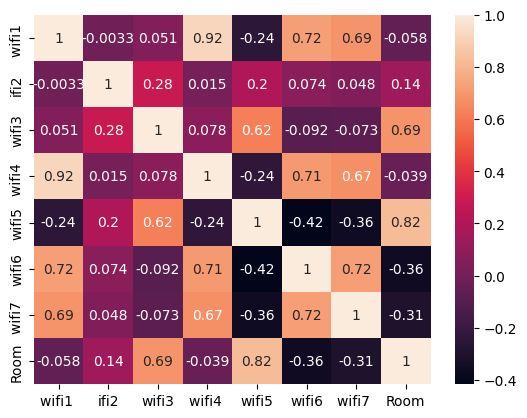

In [28]:
sns.heatmap(df.corr() , annot= True)

<Axes: xlabel='wifi3', ylabel='Count'>

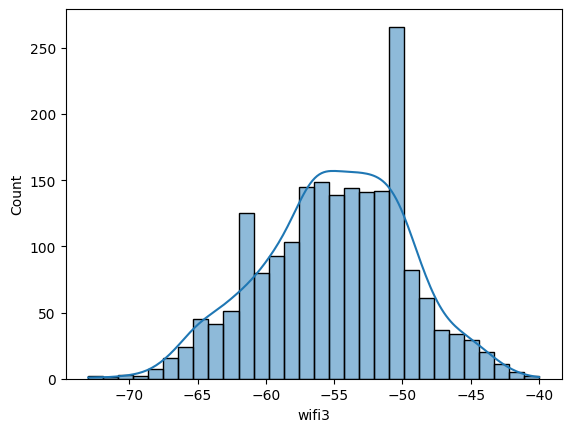

In [30]:
sns.histplot(df["wifi3"] , kde=True)

<Axes: xlabel='wifi5', ylabel='wifi3'>

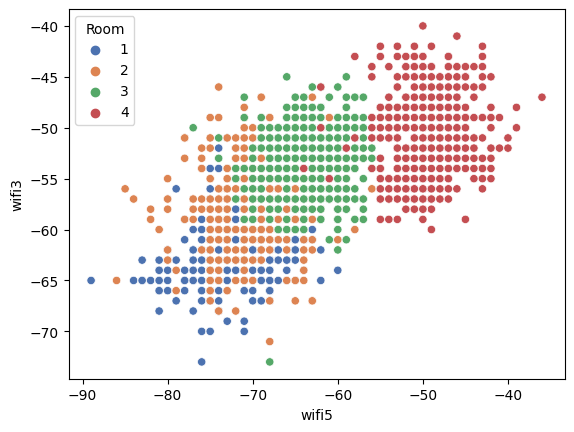

In [35]:
sns.scatterplot(data = df , x = "wifi5" , y = "wifi3" , hue = "Room" , palette="deep")  # hue genelde target'a verilir 

# Boyut İndirgeme Teknikleri (PCA-LDA-tSNE)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2 , random_state=53)


In [56]:
x = df.drop("Room" , axis=1)
y = df.Room

In [57]:
x

,wifi1,ifi2,wifi3,wifi4,wifi5,wifi6,wifi7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87
...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94
1996,-59,-56,-50,-62,-47,-87,-90
1997,-62,-59,-46,-65,-45,-87,-88
1998,-62,-58,-52,-61,-41,-90,-85


In [58]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    4
1996    4
1997    4
1998    4
1999    4
Name: Room, Length: 2000, dtype: int64

In [59]:
pca_result =pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result , columns=["Comp1" , "Comp2"]) 

pca_df["Room"] = y
pca_df

,Comp1,Comp2,Room
0,-13.420580,14.121511,1
1,-17.354605,14.091161,1
2,-14.205887,17.789814,1
3,-9.886346,20.566852,1
4,-11.146006,18.489701,1
...,...,...,...
1995,-19.683483,-11.314212,4
1996,-16.896809,-13.850302,4
1997,-20.510498,-15.751400,4
1998,-18.781045,-17.510348,4


<Axes: xlabel='Comp1', ylabel='Comp2'>

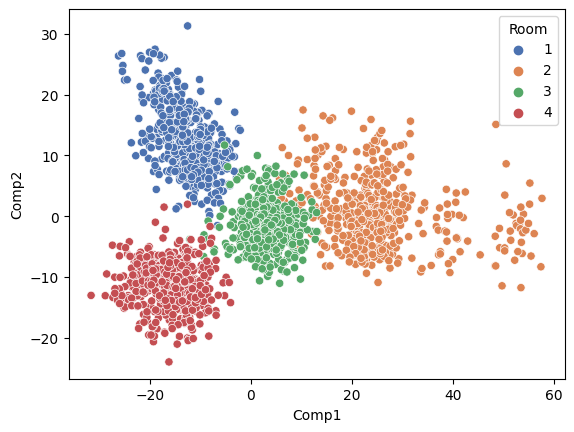

In [60]:
sns.scatterplot(data = pca_df ,x = "Comp1" , y = "Comp2" , hue = "Room" , palette="deep")

In [54]:
# LDA - t-SNE de aynı şekilde yapılır. PCA ile aynıdır 

## Mode Kurma

In [63]:
from sklearn.model_selection import train_test_split

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 53 ,shuffle = True)

In [71]:
x

,wifi1,ifi2,wifi3,wifi4,wifi5,wifi6,wifi7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87
...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94
1996,-59,-56,-50,-62,-47,-87,-90
1997,-62,-59,-46,-65,-45,-87,-88
1998,-62,-58,-52,-61,-41,-90,-85


In [72]:
X_train

,wifi1,ifi2,wifi3,wifi4,wifi5,wifi6,wifi7
1817,-63,-56,-51,-64,-49,-88,-89
641,-51,-57,-59,-45,-77,-75,-81
1269,-51,-54,-51,-53,-60,-86,-79
1603,-65,-62,-49,-67,-45,-88,-94
1760,-58,-57,-46,-56,-43,-89,-85
...,...,...,...,...,...,...,...
1787,-61,-55,-52,-61,-44,-88,-92
421,-63,-57,-66,-63,-68,-82,-82
885,-36,-55,-59,-37,-63,-70,-73
797,-39,-54,-56,-40,-70,-77,-78


In [73]:
y_train

1817    4
641     2
1269    3
1603    4
1760    4
       ..
1787    4
421     1
885     2
797     2
1561    4
Name: Room, Length: 1600, dtype: int64

## KNN Model

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [76]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_pred = knn_model.predict(X_test)

In [79]:
y_pred

array([2, 1, 3, 2, 4, 2, 2, 1, 1, 4, 3, 1, 2, 4, 4, 4, 3, 1, 2, 2, 2, 2,
       1, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 4, 3, 3, 3, 2, 2, 1, 2, 2, 4, 1,
       2, 1, 3, 2, 1, 3, 2, 3, 4, 2, 3, 3, 4, 2, 2, 1, 1, 1, 4, 1, 1, 2,
       1, 2, 3, 1, 2, 4, 1, 4, 1, 2, 3, 1, 1, 1, 4, 3, 2, 1, 3, 3, 4, 4,
       4, 2, 3, 3, 3, 1, 1, 3, 4, 1, 3, 3, 2, 1, 4, 1, 3, 4, 3, 2, 4, 2,
       1, 2, 4, 2, 2, 1, 4, 4, 2, 1, 3, 3, 4, 3, 1, 1, 4, 1, 1, 4, 1, 3,
       1, 4, 4, 2, 1, 3, 3, 3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 4, 2, 2, 1, 2,
       3, 4, 1, 4, 2, 4, 1, 2, 1, 3, 2, 4, 1, 2, 3, 4, 3, 1, 1, 4, 2, 1,
       1, 2, 1, 2, 4, 3, 4, 1, 3, 3, 2, 2, 4, 1, 1, 4, 3, 4, 4, 3, 1, 3,
       3, 3, 1, 1, 1, 1, 2, 2, 4, 1, 4, 3, 4, 4, 2, 3, 3, 3, 2, 3, 1, 1,
       1, 1, 1, 2, 4, 3, 1, 3, 2, 2, 1, 4, 1, 4, 2, 2, 3, 1, 4, 2, 1, 4,
       1, 1, 1, 4, 1, 4, 1, 4, 3, 2, 3, 4, 2, 4, 2, 3, 4, 2, 1, 3, 4, 2,
       4, 2, 1, 2, 3, 3, 1, 3, 1, 3, 2, 4, 3, 3, 4, 2, 4, 1, 2, 1, 3, 4,
       3, 4, 4, 1, 2, 4, 2, 3, 1, 3, 4, 4, 1, 4, 2,

In [80]:
y_test

708     2
267     1
1030    3
857     2
1850    4
       ..
390     1
1557    4
470     1
1829    4
1272    3
Name: Room, Length: 400, dtype: int64

In [82]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix # Modeli değerlendirme 

In [95]:
accuracy_score(y_test , y_pred)

0.9925

In [85]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       106
           2       1.00      1.00      1.00        93
           3       1.00      0.97      0.98       101
           4       0.99      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [90]:
confusion_matrix(y_test , y_pred)

array([[106,   0,   0,   0],
       [  0,  93,   0,   0],
       [  2,   0,  98,   1],
       [  0,   0,   0, 100]], dtype=int64)

# Crossval İşlemi

In [96]:
from sklearn.model_selection import cross_val_score

In [99]:
cross_val_score(knn_model , x , y , cv=5).mean()

0.9795

### SVC MODEL

In [100]:
from sklearn.svm import SVC

In [103]:
svc_model = SVC(kernel="rbf" , C = 10) 

In [104]:
svc_model.fit(X_train,y_train)

SVC(C=10)

In [105]:
svc_y_pred = svc_model.predict(X_test)

In [106]:
# Done